<a href="https://colab.research.google.com/github/nedokormysh/GB_App_Statistics_Med/blob/lesson_2_descriptive_statistics/GB_app_statistics_med_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 2. Основные распределения вероятностей, использующиеся при анализе данных

# Условие

Сделайте описательные статистики с визуализацией для нескольких дискретных и непрерывных величин на ваш выбор.

Постройте гистограммы распределения значений имеющихся у вас переменных, предположите лежащий в их основе вид распределения.

Для тех, кто хочет заморочиться: придумайте, как привести к нормальному распределению те непрерывные величины, которые у вас распределены ненормально.

Задание выполняется на языке R и предоставляется в формате html/PDF рендера Quarto ноутбука или Google Colab (последнее предпочтительно).

In [1]:
install.packages('tidyverse')
install.packages('skimr')
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:
# library(dplyr)
library(tidyverse)
require(readxl)
library(skimr)
library(psych)

# Загрузка данных

In [ ]:
# options(warn = -1)

In [ ]:
hdl <- read_tsv('https://raw.githubusercontent.com/nedokormysh/GB_App_Statistics_Med/lesson_2_descriptive_statistics/high_density_lipids.tsv') |>
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number),
         Vial.number = as.factor(Vial.number))

ldl <- read_tsv('https://raw.githubusercontent.com/nedokormysh/GB_App_Statistics_Med/lesson_2_descriptive_statistics/low_density_lipids.tsv') |>
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number),
         Vial.number = as.factor(Vial.number))

lipids <- full_join(hdl, ldl, by = c("Vial.number", "Patient.number"),
 suffix = c('hdl', 'ldl'))

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# meta <- read_xlsx('https://raw.githubusercontent.com/nedokormysh/GB_App_Statistics_Med/lesson_2_descriptive_statistics/metadata.xlsx', sheet = 1) |>
#   rename_with(make.names)

meta <- read_xlsx('/content/metadata.xlsx', sheet = 1) |>
  rename_with(make.names)

In [ ]:
descriptive <- read_xlsx('/content/metadata.xlsx', sheet = 2) |>
  rename('Variable' = '...1', 'Description' = '...2') |>
  drop_na()

Итого у нас 3 таблицы: объединённая lipids, meta, descriptive

In [ ]:
descriptive[10,]$Variable <- 'LVH'

In [ ]:
# print(meta, print.data.frame = FALSE)

In [ ]:
# цикл по всем столбцам таблицы meta
for (col_name in colnames(meta)) {
  # находим индекс соответствующей строки в таблице descriptive
  index <- match(col_name, descriptive$Variable)

  # если индекс не равен NA, то добавляем атрибут с описанием
  if (!is.na(index)) {
    attr(meta[[col_name]], 'label') <- descriptive$Description[index]
  }
}

In [ ]:
print(attr(meta$BMI, 'label'))

[1] "body mass index"


In [ ]:
# Выбираем столбцы с данными пациентов
patient_cols <- c('Vial.number',
                  'Patient.number',
                  'Name',
                  'Date',
                  'Age')


# Создаем таблицу с данными пациентов
patient_data <- meta[patient_cols]

# Создаем таблицу с клиническими данными
clinical_data <- meta |> select(-Name, -Age, -Date, -Sucrose)

# # Сохраняем таблицы в виде отдельных файлов
# write.csv(patient_data, file = 'patient_data.csv', row.names = FALSE)
# write.csv(clinical_data, file = 'clinical_data.csv', row.names = FALSE)

In [ ]:
head(clinical_data, 3)

Vial.number,Patient.number,Group,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,50,0,6.5,163,84,31.61579,125,76,67,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425,1,1,NA
2,51,0,5.5,179,111,34.64311,125,82,65,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400,1,0,NA
3,52,1,7.0,164,80,29.74420,132,80,92,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500,3,1,Type 2 diabetes mellitus; MI - 2016


In [ ]:
# заменяем 3 точки на точку во всех названиях столбцов
colnames(clinical_data) <- sub("\\.+", ".", colnames(clinical_data))

In [ ]:
# colnames(clinical_data)

In [ ]:
colnames_factor = c('Vial.number', 'Patient.number', 'Group', 'Sm', 'Dm', 'HT',
                    'LVH', 'IHD', 'MI', 'Str', 'A_C', 'A_H', 'A_D', 'Plaque',
                    'Statins')

In [ ]:
# преобразуем указанные столбцы в фактор
clinical_data[, colnames_factor] <- lapply(clinical_data[, colnames_factor], as.factor)

In [ ]:
head(clinical_data, 3)

Vial.number,Patient.number,Group,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
1,50,0,6.5,163,84,31.61579,125,76,67,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425,1,1,NA
2,51,0,5.5,179,111,34.64311,125,82,65,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400,1,0,NA
3,52,1,7.0,164,80,29.74420,132,80,92,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500,3,1,Type 2 diabetes mellitus; MI - 2016


# Описательные статистики
Сделайте описательные статистики с визуализацией для нескольких дискретных и непрерывных величин на ваш выбор.

## Категориальные

In [ ]:
factor_desc_stats <- skimr::skim(select(clinical_data, where(is.factor)))

factor_desc_stats

── Data Summary ────────────────────────
                           Values                      
Name                       select(clinical_data, whe...
Number of rows             38                          
Number of columns          15                          
_______________________                                
Column type frequency:                                 
  factor                   15                          
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable  n_missing complete_rate ordered n_unique
 1 Vial.number            0         1     FALSE         38
 2 Patient.number         0         1     FALSE         32
 3 Group                  0         1     FALSE          2
 4 Sm                     0         1     FALSE          2
 5 Dm                     0         1     FALSE          2
 6 HT              

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 7' in coercion to 'logical(1)'


В статинах пропущенно 1 значение.

## Численные

In [ ]:
num_desc_stats <- skimr::skim(select(clinical_data, where(is.numeric)))

num_desc_stats

── Data Summary ────────────────────────
                           Values                      
Name                       select(clinical_data, whe...
Number of rows             38                          
Number of columns          29                          
_______________________                                
Column type frequency:                                 
  numeric                  29                          
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable    n_missing complete_rate    mean     sd      p0     p25
 1 Plasma.volume            0             1   9.45   2.88    5       6.5  
 2 Ht                       0             1 165      6.31  150     161    
 3 Wt                       0             1  74.9   14.3    56.5    63.2  
 4 BMI                      0             1  27.5    5.23   20.3    23.0 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


## Общее описание

In [ ]:
all_desc <- psych::describe(clinical_data)

head(all_desc, 5)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vial.number*,1,38,19.500000,11.1130554,19.50,19.500000,14.08470,1,38,37,0.0000000,-1.295067,1.80277564
Patient.number*,2,38,16.078947,8.6848161,15.50,16.000000,9.63690,1,32,31,0.1290362,-1.047877,1.40886322
Group*,3,38,1.631579,0.4888515,2.00,1.656250,0.00000,1,2,1,-0.5241524,-1.769778,0.07930219
Plasma.volume,4,38,9.452632,2.8760650,10.25,9.521875,4.07715,5,13,8,-0.2757849,-1.596633,0.46655934
Ht,5,38,165.000000,6.3074388,165.00,164.812500,5.93040,150,180,30,0.2724560,0.156732,1.02320168


### Dia

диастолическое артериальное давление

In [ ]:
# hist(clinical_data$Dia)

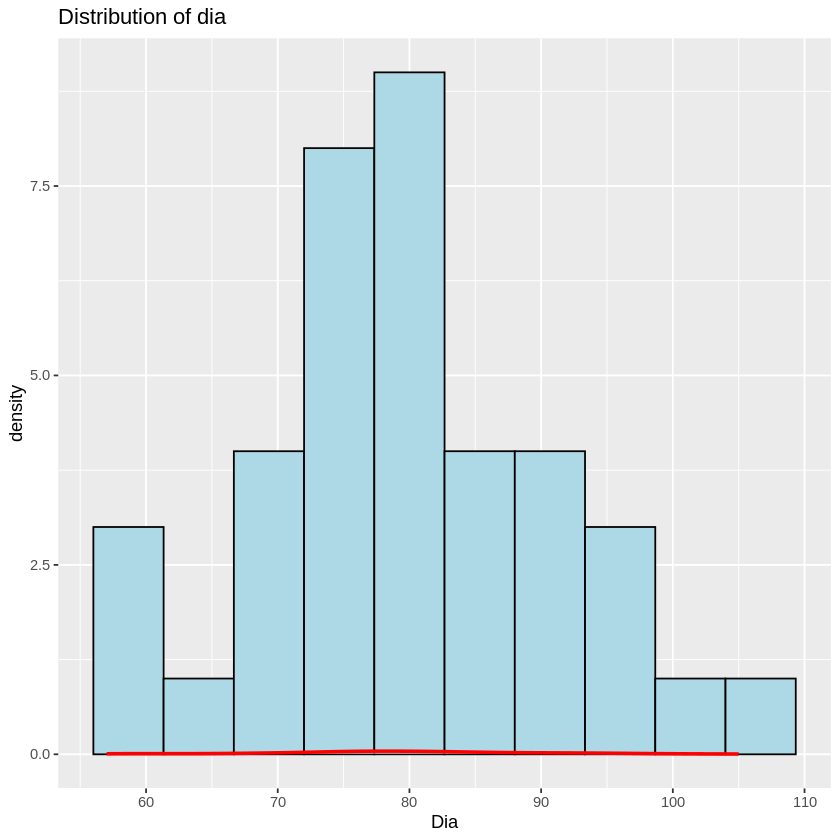

In [ ]:
ggplot(clinical_data, aes(Dia)) +
  geom_histogram(color='black', fill='lightblue', bins = 10) +
  geom_density(alpha = 0.5, fill = 'pink', color = 'red', size = 1) +
  ggtitle('Distribution of dia')

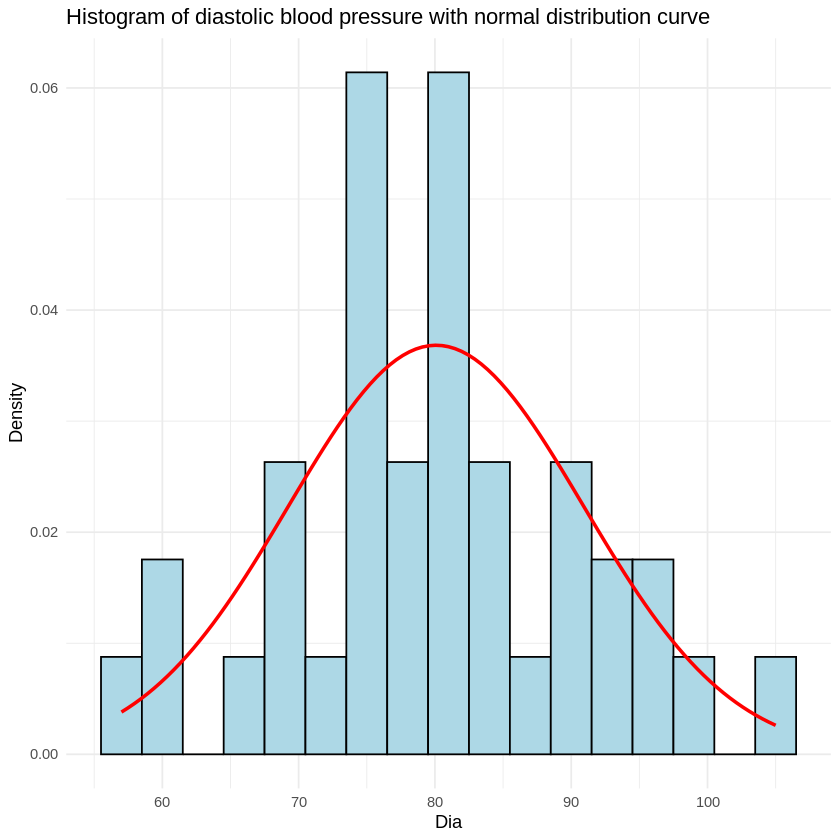


	Shapiro-Wilk normality test

data:  clinical_data$Dia
W = 0.98572, p-value = 0.9002


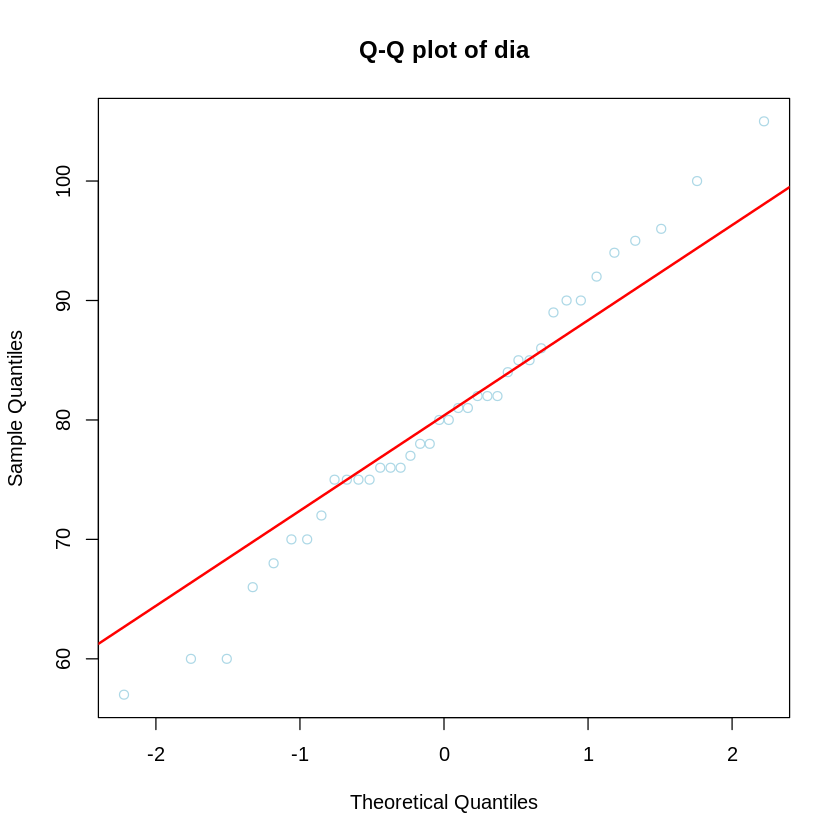

In [ ]:
# Гистограмма
# hist(clinical_data$Dia, probability = TRUE, col = 'lightblue', border = 'black',
#      main = 'Histogram of dia', xlab = 'Dia')
# curve(dnorm(x, mean = mean(clinical_data$Dia), sd = sd(clinical_data$Dia)),
#       add = TRUE, col = 'red', lwd = 2)

ggplot(clinical_data, aes(x = Dia)) +
  geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'lightblue', color = 'black') +
  stat_function(fun = dnorm, args = list(mean = mean(clinical_data$Dia), sd = sd(clinical_data$Dia)),
                color = 'red', size = 1) +
  theme_minimal() +
  labs(title = 'Histogram of diastolic blood pressure with normal distribution curve',
       x = 'Dia',
       y = 'Density')

# Q-Q plot
qqnorm(clinical_data$Dia, main = 'Q-Q plot of dia', col = 'lightblue')
qqline(clinical_data$Dia, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$Dia)

p-значение равно 0,9002, что больше уровня значимости 0,05. Это означает, что нулевая гипотеза о нормальности распределения не может быть отвергнута. Таким образом, можно предположить, что распределение переменной диастолического артериального давления нормально.

Может быть лучше говорить о распредлении Стьюдента, т.к. выборка мала.

Хотя по QQ plot всё таки есть отличия от нормального распределения.

### Choi.25

общий уровень холистерола

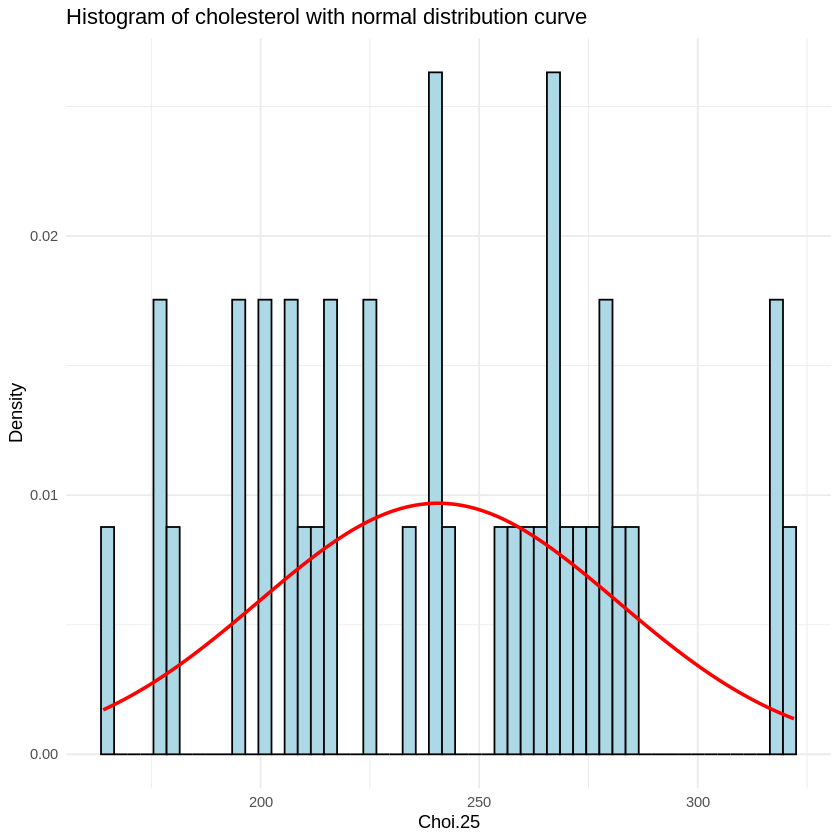


	Shapiro-Wilk normality test

data:  clinical_data$Choi.25
W = 0.96942, p-value = 0.3763


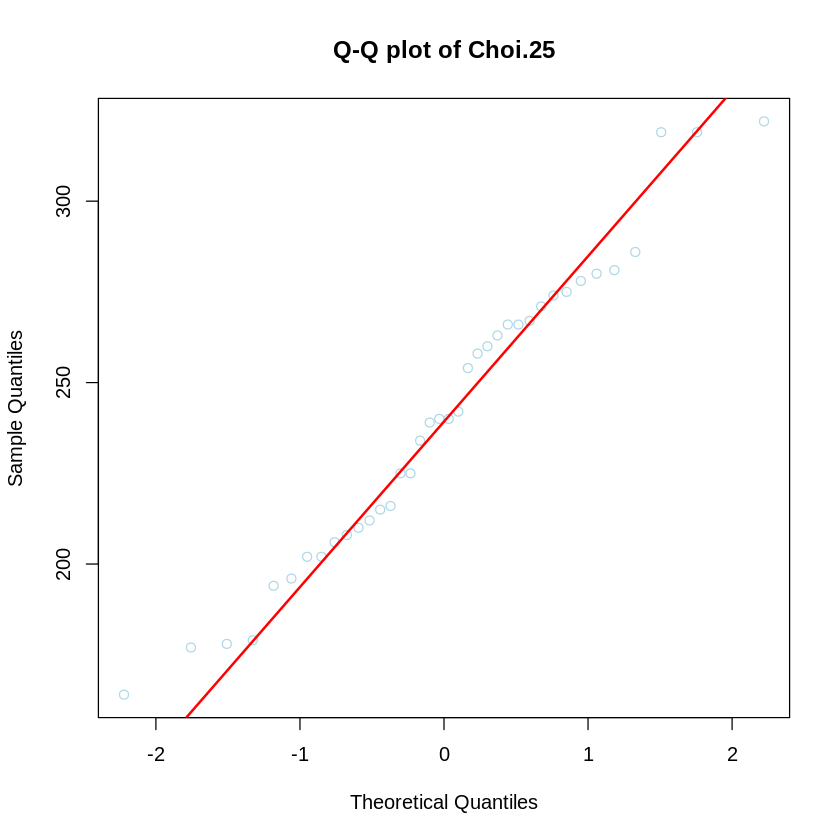

In [ ]:
# Гистограмма
ggplot(clinical_data, aes(x = Choi.25)) +
  geom_histogram(aes(y = ..density..), binwidth = 3, fill = 'lightblue', color = 'black') +
  stat_function(fun = dnorm, args = list(mean = mean(clinical_data$Choi.25), sd = sd(clinical_data$Choi.25)),
                color = 'red', size = 1) +
  theme_minimal() +
  labs(title = 'Histogram of cholesterol with normal distribution curve',
       x = 'Choi.25',
       y = 'Density')

# Q-Q plot
qqnorm(clinical_data$Choi.25, main = 'Q-Q plot of Choi.25', col = 'lightblue')
qqline(clinical_data$Choi.25, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$Choi.25)

По Шапиро-Уилку - нормальное распределение.
Но данных слишком мало, чтобы действительно считать это распределение нормальным.

In [ ]:
# ggplot(clinical_data, aes(Choi.25)) +
#   geom_histogram(color='black', fill='lightblue', bins = 40) +
#   geom_density(alpha = 0.5, fill = 'pink', color = 'red', size = 1) +
#   ggtitle('Distribution of cholesterol')

In [ ]:
# ggplot(clinical_data, aes(Dia)) +
#   geom_histogram(color = 'black', fill = 'lightblue', bins = 40) +
#   stat_function(fun = dnorm, args = list(mean = mean(clinical_data$Dia), sd = sd(clinical_data$Dia)),
#                 color = 'red', size = 1) +
#   stat_function(fun = dt, args = list(df = 5, ncp = 0),
#                 color = 'green', size = 1) +
#   stat_function(fun = dpois, args = list(lambda = mean(Dia)),
#                 color = 'blue', size = 1) +
#   ggtitle('Distribution of cholesterol')


### r.lat.min

минимальная толщина артерии

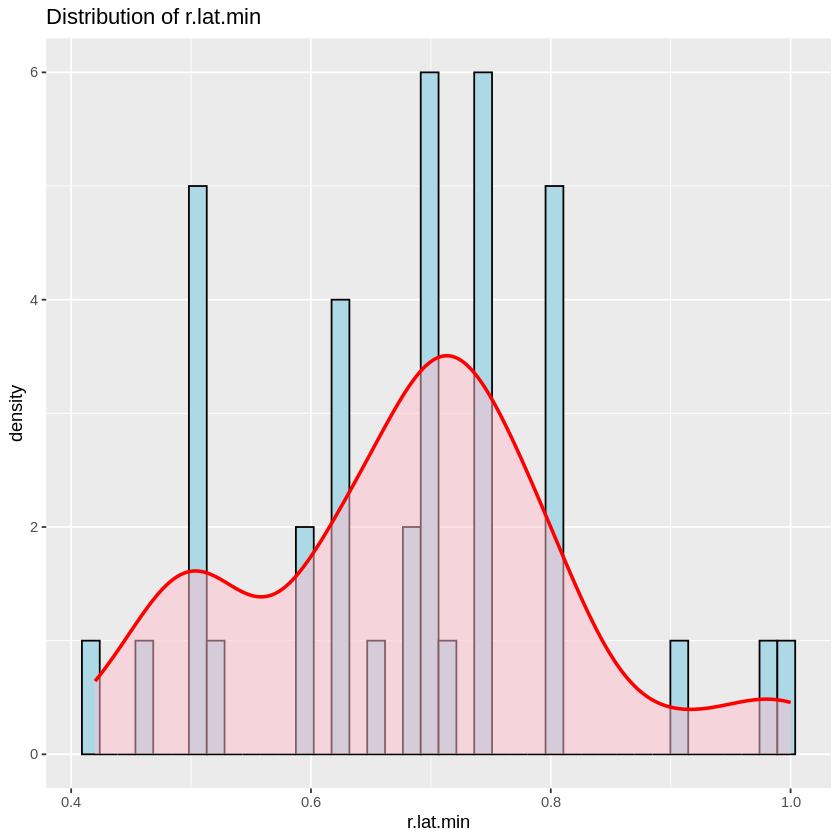

In [ ]:
ggplot(clinical_data, aes(r.lat.min)) +
  geom_histogram(color='black', fill='lightblue', bins = 40) +
  geom_density(alpha = 0.5, fill = 'pink', color = 'red', size = 1) +
  ggtitle('Distribution of r.lat.min')


	Shapiro-Wilk normality test

data:  clinical_data$r.lat.min
W = 0.95879, p-value = 0.1734


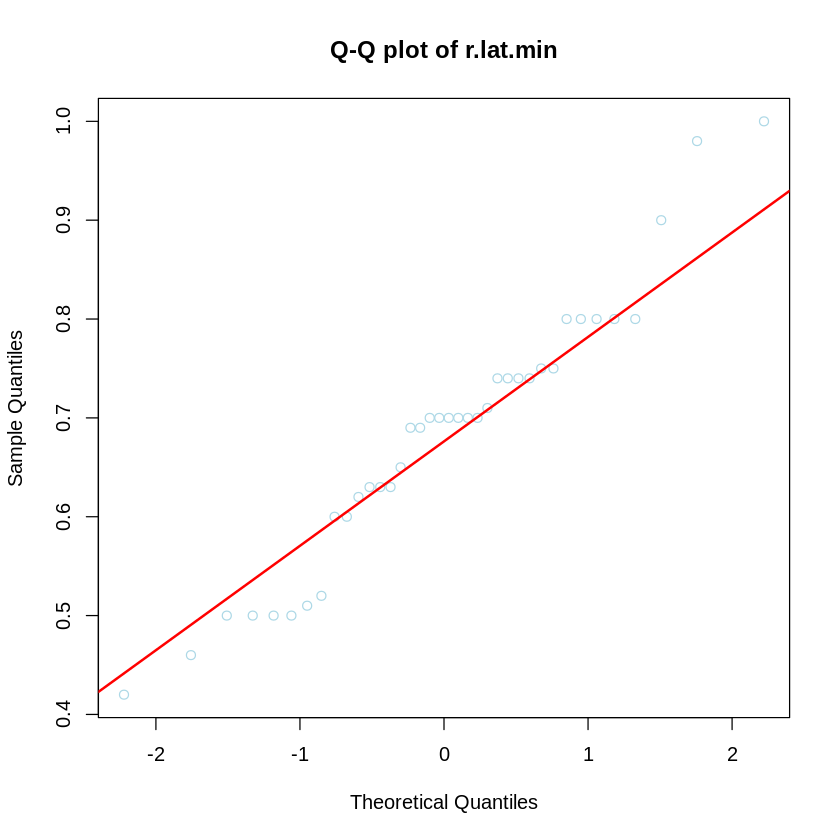

In [ ]:
# Гистограмма
# ggplot(clinical_data, aes(x = r.lat.min)) +
#   geom_histogram(aes(y = ..density..), binwidth = 5, fill = 'lightblue', color = 'black') +
#   stat_function(fun = dnorm, args = list(mean = mean(clinical_data$r.lat.min), sd = sd(clinical_data$r.lat.min)),
#                 color = 'red', size = 1) +
#   theme_minimal() +
#   labs(title = 'Histogram of r.lat.min with normal distribution curve',
#        x = 'r.lat.min',
#        y = 'Density')

# Q-Q plot
qqnorm(clinical_data$r.lat.min, main = 'Q-Q plot of r.lat.min', col = 'lightblue')
qqline(clinical_data$r.lat.min, col = 'red', lwd = 2)

# Тест Шапиро-Уилка
shapiro.test(clinical_data$r.lat.min)

На мой взгляд, всё таки данных для определения нормальности распределения не хватает.

### Plaque

Видимо цифры обозначают категории или степень тяжести атеросклеротических бляшек.

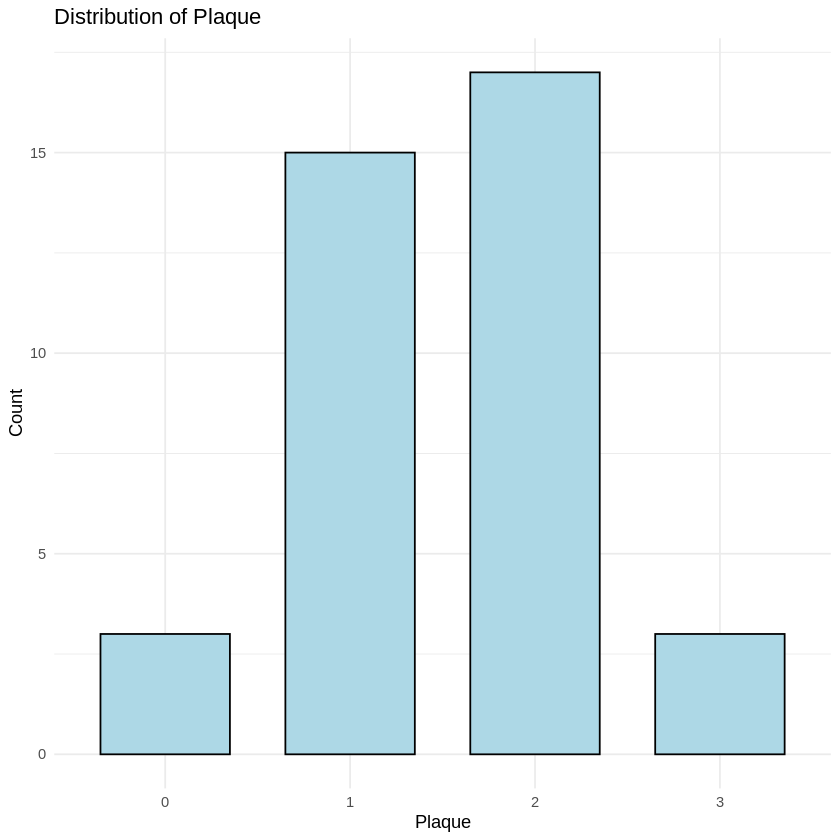

In [ ]:
ggplot(data = clinical_data, aes(x = Plaque)) +
  geom_bar(color = 'black', fill = "lightblue", width = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Plaque",
       x = "Plaque",
       y = "Count")

Из того, что мы проходили, то ближе всего гипергеометрическое распределение. Хотя не уверен, что тут вообще можно применять этот закон.

### Statins

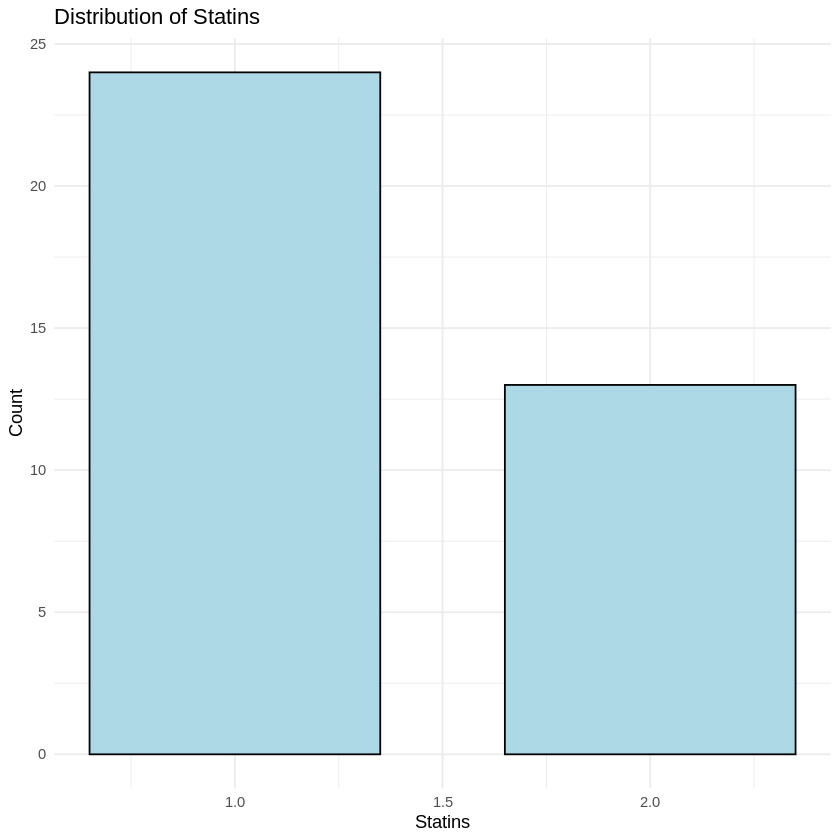

In [ ]:
ggplot(data = clinical_data, aes(x = as.numeric(clinical_data$Statins))) +
  geom_bar(color = 'black', fill = "lightblue", width = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Statins",
       x = "Statins",
       y = "Count")

Биномиальное распределение.

In [ ]:
# ggplot(data = clinical_data, aes(x = as.numeric(clinical_data$Statins), y = LDLi.28)) +
#   geom_point(alpha = 0.5, color = "lightblue") +
#   geom_boxplot(alpha = 0.2, fill = "lightblue") +
#   theme_minimal() +
#   labs(title = "Scatter plot of LDLi by Statins",
#        x = "Statins",
#        y = "LDLi")

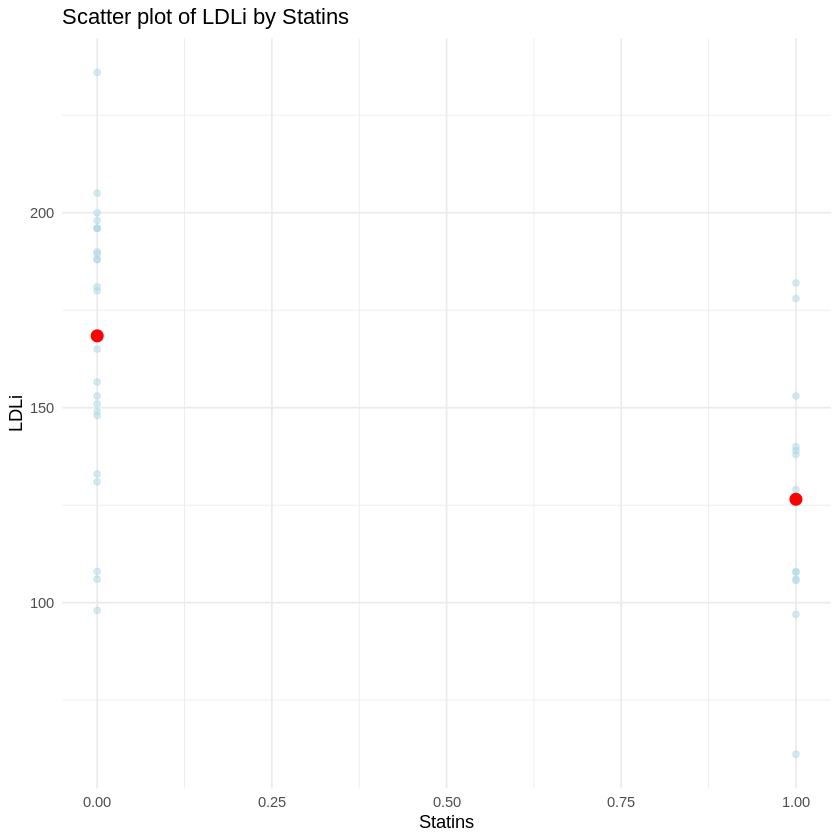

In [ ]:
# рассмотрим уровень ЛПНП в этих двух группах пациентов.
# # Преобразуем бинарную переменную Statins в числовую переменную
# clinical_data$HT_num <- as.numeric(clinical_data$Statins == "1")

# # Вычисляем средние значения LDLi для каждого значения Statins
# mean_ldl_by_statins <- clinical_data %>%
#   group_by(Statins_num) %>%
#   summarise(mean_ldl = mean(LDLi.28, na.rm = TRUE))

# # # Построим диаграмму рассеяния
# ggplot(data = clinical_data, aes(x = Statins_num, y = LDLi.28)) +
#   geom_point(alpha = 0.5, color = "lightblue") +
#   geom_point(data = mean_ldl_by_statins, aes(x = Statins_num, y = mean_ldl), size = 3, color = "red") +
#   theme_minimal() +
#   labs(title = "Scatter plot of LDLi by Statins",
#        x = "Statins",
#        y = "LDLi")
